<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping  # For early stopping implementation

In [4]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [6]:
cali_df = pd.DataFrame(cali.data, columns = cali.feature_names)
cali_df['price'] = cali.target
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [8]:
X = cali_df.drop(columns = ['price','Latitude','Longitude'])
y = cali_df['price']

In [9]:
X_shape = X.shape[1]
X_shape

6

In [10]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [24]:
model = Sequential()
model.add(Input(shape=(X_shape,))) 
model.add(Dense(24, activation='relu'))  
model.add(Dense(1, activation='linear'))  

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [27]:
model.compile(loss= 'mse',  
              optimizer='adam',
              metrics=['mse'])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [32]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,            
                    validation_data = (X_test, y_test),
                    verbose = 0) 

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

In [147]:
def plot_loss_and_score(hist,ylimit=True, xlimit=False):
    train_loss = hist.history['loss']
    val_loss = hist.history['val_loss'] 
    train_mse = hist.history['mse']
    val_mse = hist.history['val_mse']
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5), sharey=True)
    
    # Plot the training and validation loss
    ax1.plot(hist.history['loss'], label='Training loss', color='blue')
    ax1.plot(hist.history['val_loss'], label='Validation loss', color='orange')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training loss vs Validation loss')
    if ylimit: ax1.set_ylim(0,10)
    if xlimit: ax1.set_xlim(0,15)
        
    # Plot the training and validation accuracy (MSE)
    ax2.plot(hist.history['mse'], label='Training MSE', color='blue')
    ax2.plot(hist.history['val_mse'], label='Validation MSE', color='orange')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MSE')
    ax2.set_title('Training MSE vs Validation MSE')
    if xlimit: ax2.set_xlim(0,15)

    ax2.legend()
    
    plt.tight_layout()
    plt.show()

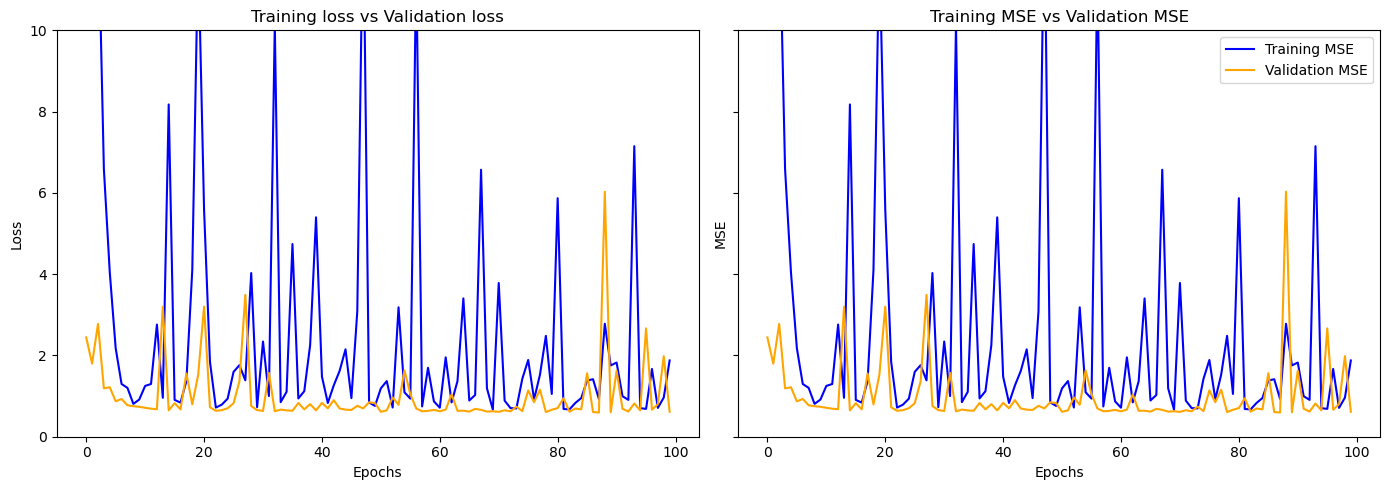

In [121]:
plot_loss_and_score(history)

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [52]:
model2 = Sequential()
model2.add(Input(shape=(X_shape,))) 
model2.add(Dense(64, activation='relu'))
model2.add(Dense(128, activation='relu'))  
model2.add(Dense(64, activation='relu'))  
model2.add(Dense(1, activation='linear')) 

In [54]:
model2.compile(loss= 'mse',  
              optimizer='adam',
              metrics=['mse'])

In [56]:
history2 = model2.fit(X_train,
                    y_train,
                    epochs=100,            
                    validation_data = (X_test, y_test),
                    verbose = 0) 

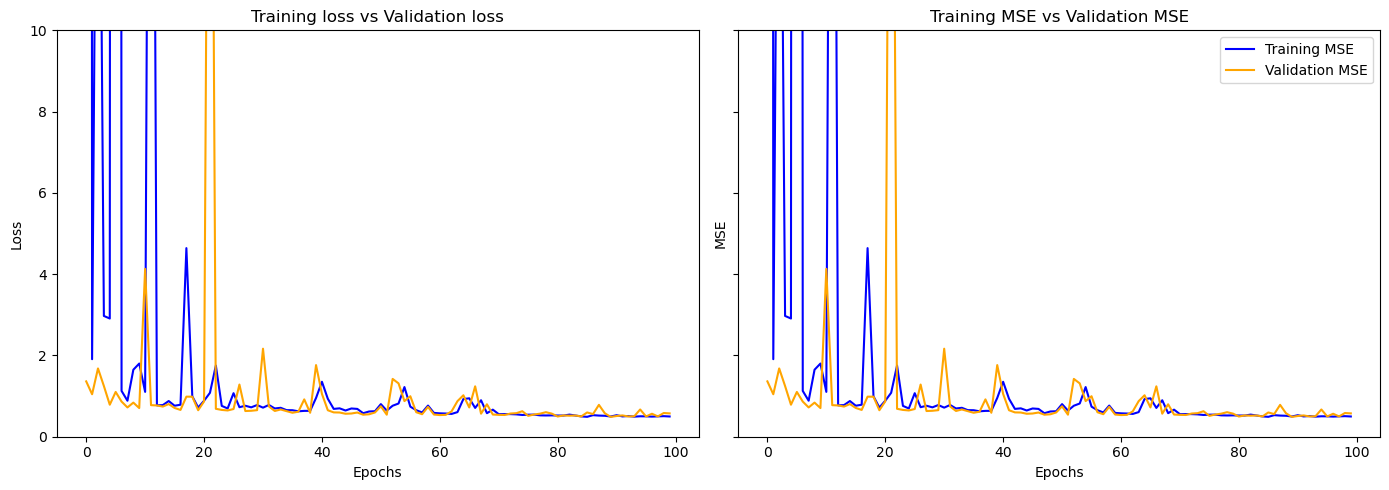

In [123]:
plot_loss_and_score(history2)

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

##### Does this change anything?

In [60]:
model_deep_bn = Sequential()
model_deep_bn.add(Input(shape=(X_shape,))) 
model_deep_bn.add(BatchNormalization())              
model_deep_bn.add(Dense(64, activation='relu'))
model_deep_bn.add(Dense(128, activation='relu'))  
model_deep_bn.add(Dense(64, activation='relu'))  
model_deep_bn.add(Dense(1, activation='linear')) 

model_deep_bn.compile(loss= 'mse',  
              optimizer='adam',
              metrics=['mse'])

history_bn = model_deep_bn.fit(X_train,
                    y_train,
                    epochs=100,            
                    validation_data = (X_test, y_test),
                    verbose = 0) 

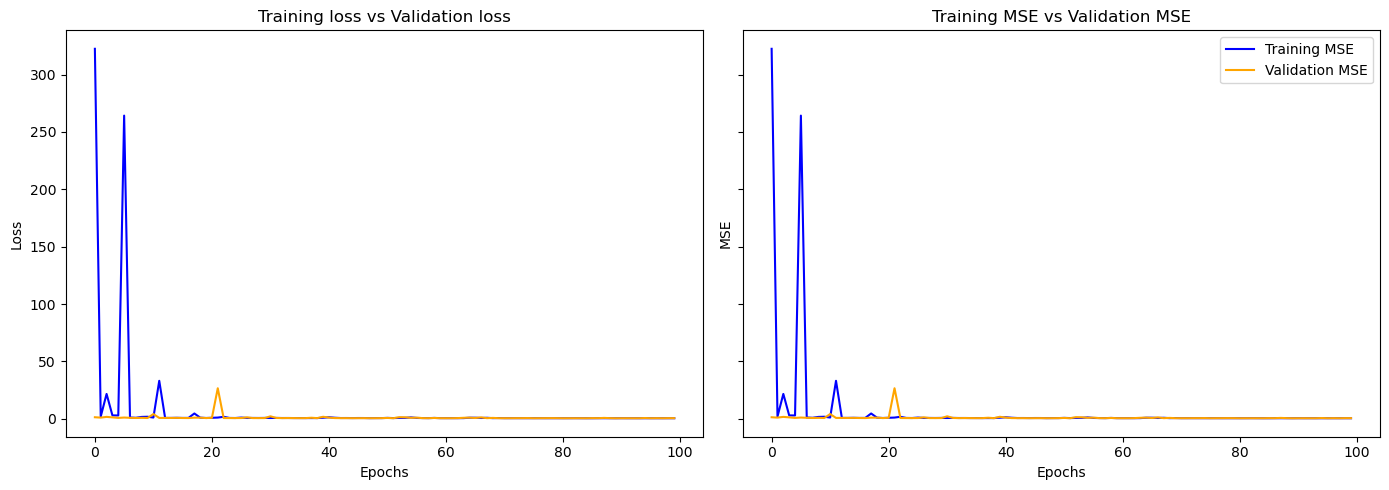

In [145]:
plot_loss_and_score(history2, ylimit =False)

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [85]:
es = EarlyStopping(
    monitor = 'val_loss'
    , patience = 5
    , restore_best_weights = True 
)

In [64]:
model_es = Sequential()
model_es.add(Input(shape=(X_shape,))) 
model_es.add(BatchNormalization())              
model_es.add(Dense(64, activation='relu'))
model_es.add(Dense(128, activation='relu'))  
model_es.add(Dense(64, activation='relu'))  
model_es.add(Dense(1, activation='linear')) 

model_es.compile(loss= 'mse',  
              optimizer='adam',
              metrics=['mse'])

history_es = model_es.fit(X_train, 
                          y_train,
                          epochs=100,            
                          validation_data = (X_test, y_test),
                          verbose = 0,
                          callbacks = [es]) 

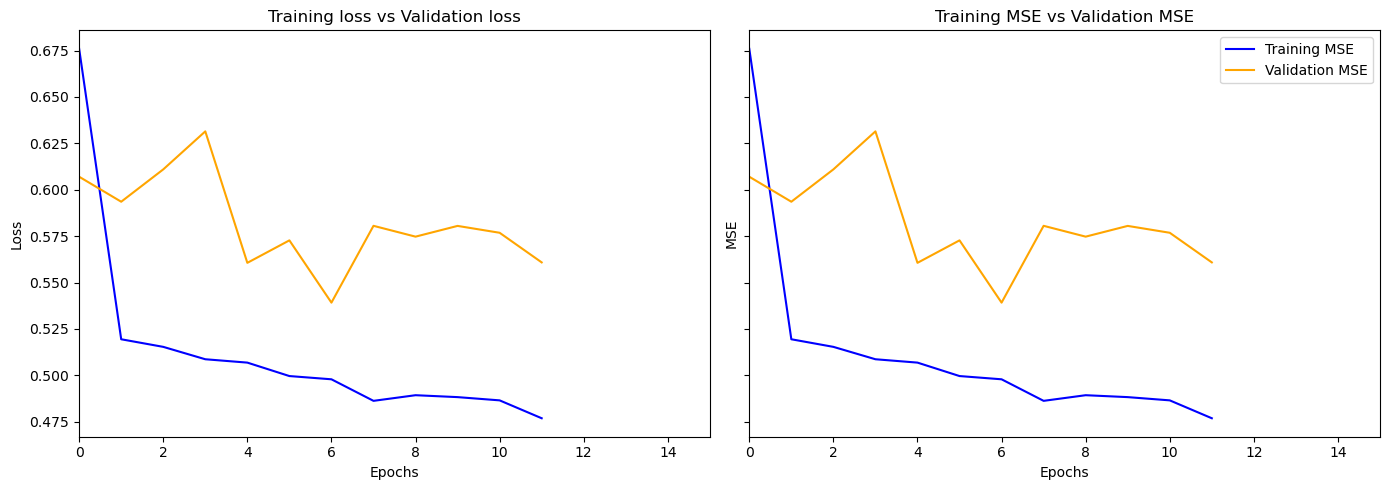

In [149]:
plot_loss_and_score(history_es, ylimit=False, xlimit = True)

**How many epochs do you think are appropriate?**

In [151]:
# 11 epochs is appropriate because the model stopped at the 11th epoch, 
# but the validation loss did not decrease after the 4th epoch.

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [153]:
model_dropout = Sequential()
model_dropout.add(Input(shape=(X_shape,))) 
model_dropout.add(BatchNormalization())              
model_dropout.add(Dense(64, activation='relu'))
model_dropout.add(Dropout(0.05))
model_dropout.add(Dense(128, activation='relu'))  
model_dropout.add(Dropout(0.20))
model_dropout.add(Dense(64, activation='relu'))  
model_dropout.add(Dense(1, activation='linear')) 

model_dropout.compile(loss= 'mse',  
              optimizer='adam',
              metrics=['mse'])

history_dropout = model_dropout.fit(X_train, 
                          y_train,
                          epochs=100,            
                          validation_data = (X_test, y_test),
                          verbose = 0,
                          callbacks = [es]) 

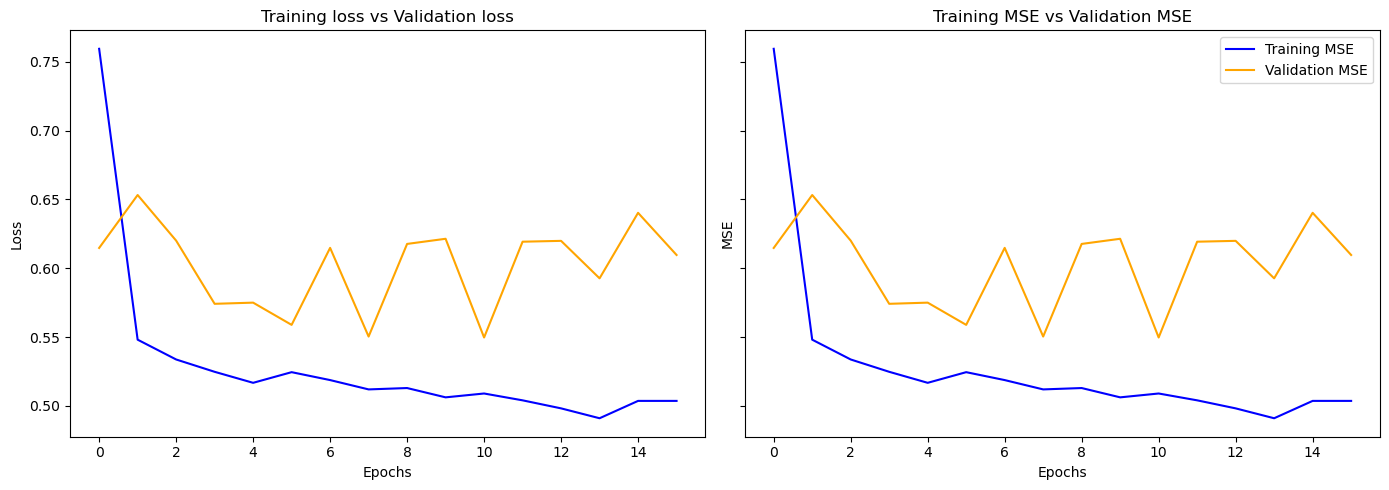

In [157]:
plot_loss_and_score(history_dropout, ylimit=False)

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [161]:
from sklearn.metrics import root_mean_squared_error

In [203]:
# Baseline model --> model
y_pred_baseline = model.predict(X_test, verbose = 0)
rmse_baseline = root_mean_squared_error(y_test, y_pred_baseline)

# Optimized model --> model_es (early stop and not dropout)
y_pred_optimized = model_es.predict(X_test, verbose = 0)
rmse_optimized = root_mean_squared_error(y_test, y_pred_optimized)

In [204]:
print(f'RMSE from baseline Model: {rmse_baseline:.4f}')
print(f'RMSE from optimized Model: {rmse_optimized:.4f}')

RMSE from baseline Model: 0.7834
RMSE from optimized Model: 0.7343


In [ ]:
# The optimized model is better than the baseline model by approximately 0.05 (RMSE).

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [211]:
model_reg = Sequential()
model_reg.add(Input(shape=(X_shape,))) 
model_reg.add(BatchNormalization())              
model_reg.add(Dense(64, activation='relu', kernel_regularizer = l2(0.01)))
model_reg.add(Dense(128, activation='relu', kernel_regularizer = l2(0.01)))  
model_reg.add(Dense(64, activation='relu', kernel_regularizer = l2(0.01)))  
model_reg.add(Dense(1, activation='linear')) 

model_reg.compile(loss= 'mse',  
              optimizer='adam',
              metrics=['mse'])

history_reg = model_reg.fit(X_train, 
                          y_train,
                          epochs=100,            
                          validation_data = (X_test, y_test),
                          verbose = 0,
                          callbacks = [es]) 

In [212]:
y_pred_reg = model_reg.predict(X_test, verbose = 0)
rmse_reg = root_mean_squared_error(y_test, y_pred_reg)

In [217]:
print(f'RMSE from baseline Model: {rmse_baseline:.4f}')
print(f'RMSE from optimized Model: {rmse_optimized:.4f}')
print(f'RMSE from optimized(add regularization and scaling) Model: {rmse_reg:.4f}')

RMSE from baseline Model: 0.7834
RMSE from optimized Model: 0.7343
RMSE from optimized(add regularization and scaling) Model: 0.7820


In [219]:
# Add regularization and scaling in optimized model is better than the baseline model by approximately 0.0014 (RMSE).

### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [225]:
from tensorflow.keras.models import save_model
# save_model(model_es, 'cali_housing.h5') has warning
save_model(model_es, 'cali_housing.keras')